<!-- dom:TITLE: Programmation Python  pour les mathématiques -->
# Python Programming for Mathematics
<!-- dom:AUTHOR: Julien Guillod at [Sorbonne Université](http://www.sorbonne-universite.fr/), -->
<!-- Author: -->  
**Julien Guillod**, [Sorbonne Université](http://www.sorbonne-universite.fr/),
Licensed <a href="https://creativecommons.org/licenses/by-nc-nd/4.0/">CC BY-NC-ND</a>


All chapters are available in
[HTML](https://python.guillod.org//) and [PDF](https://python.guillod.org//python.pdf).
This notebook is also executed on [mybinder](https://mybinder.org/v2/gh/juguillod/python/master?filepath=chap03.ipynb).






# 3 Homogeneous data structures
<div id="ch:numpy"></div>

The default data structures in Python enable us to easily work with different data type (for example integer and strings). Because of the extreme flexibility of data structures in Python, performance time is sacrificed. Indeed, since data is heterogeneous, it's not possible to allow a fixed memory allocation for any type of data. Particularly in maths, very often we make use of fixed size data structure (list of integers, real or complex vectors, matrix, ...) The module Numpy defines another type of data structure called `ndarray` which is optimised for these homogeneous data structure used in mathematics and scientific computation. The documentation is available on https://docs.scipy.org/doc/numpy/.

To import the Numpy package:

In [1]:
import numpy as np

**This chapter covers:**

* table of homogeneous data

* slicing

* operations on vectors

* indexing

* graphical representations

* optimisation by parallelisation





<!-- --- begin exercise --- -->

# Exercise 3.1: Introduction to Numpy

**Create.**
Size and data type of a Numpy array must be specified during initialisation. One way of constructing a table is to make a zero array and specifying its size and type:

In [2]:
array0 = np.zeros(3, dtype=int) # 1-d array of 3 zeros
array1 = np.zeros((2,4), dtype=float) # real 2 by 4 array
array2 = np.zeros((2,2), dtype=complex) # complex square 2x2 matrix
array3 = np.zeros((5,6,4)) # 3-d array 

Another method is to input directly the values:

In [4]:
array4 = np.array([1,4,5]) # array of integer with values (1,4,5)
array5 = np.array([[1.1,2.2,3.3,4.4],[1,2,3,4]]) # real matrix with 2 rows and 4 columns
array6 = np.array([[1+1j,0.4],[3,1.5]]) # complex square 2x2 matrix with j replacing i in normal mathematics notation

Numpy will determine by itself the data type, but we can also force it to have a data type that we want:

In [5]:
array0 = np.array([1,4,5], dtype=complex) # complex array

To look up the data type for `array1` we can use its dtype attribute `array1.dtype`. The shape attribute gives us its shape `array1.shape`.
To access some specific elements in the table, we can use indexing like a Python's list:

In [6]:
print(array4[1]) # returns 4
print(array5[1,3]) # returns 4.0

4
4.0


Note that like Python's list, indexing starts at 0 not 1. Numpy arrays are mutable but in the sense that it can modify its elements' value but not its type or size:

In [7]:
array0[1] = 4
array1[1,3] = 3.3
array3[3,4,2] = 3

**Slicing.**
The slicing method allows us to access a part of the Numpy table, just like in Python:

In [8]:
print(array4[2:3]) # returns all elements with indices from 2 to 3
print(array1[0,:]) # returns the 1st line of array1
print(array1[:,-1]) # returns the last column of array1
print(array3[3,3:5,1:4]) # returns the corresponding sub-matrix

[5]
[0. 0. 0. 0.]
[0.  3.3]
[[0. 0. 0.]
 [0. 3. 0.]]


**Iteration.**
It is also possible to iterate through an array. For example, the following lines returns the sum of each line in `array5`:

In [9]:
for i in array5:
    print(np.sum(i))

11.0
10.0


**a)**
Search in the documentation the function `arange` to create the following arrays: (5,6,7,8,9) and (3,5,7,9).

<!-- --- begin hint in exercise --- -->

**Indication:**
The documentation for this function can be found [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html).

<!-- --- end hint in exercise --- -->



In [10]:
print(np.arange(5,10))
print(np.arange(3,10,2))

[5 6 7 8 9]
[3 5 7 9]



**b)**
Use the function `linspace` to generate 10 points equally distributed within the interval $[2,5]$.



In [11]:
np.linspace(2, 5, 10)

array([2.        , 2.33333333, 2.66666667, 3.        , 3.33333333,
       3.66666667, 4.        , 4.33333333, 4.66666667, 5.        ])


**c)**
Us the function `reshape` to successively transform the following arrays:

$$
(1,2,3,4,5,6)\to\begin{pmatrix}1 & 2\\ 
3 & 4\\ 
5 & 6
\end{pmatrix}\to\begin{pmatrix}1 & 2 & 3\\ 
4 & 5 & 6
\end{pmatrix}\to\begin{pmatrix}1 & 4\\ 
2 & 5\\ 
3 & 6
\end{pmatrix}
$$

In [12]:
v = np.array([1,2,3,4,5,6])
print(v)

m1 = np.reshape(v, (3,2))
print(m1)

m2 = np.reshape(m1, (2,3))
print(m2)

print(m2.T)

[1 2 3 4 5 6]
[[1 2]
 [3 4]
 [5 6]]
[[1 2 3]
 [4 5 6]]
[[1 4]
 [2 5]
 [3 6]]



<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

# Exercise 3.2: Operations on the arrays

Basic arithmetic operations are executed element by element on Numpy tables:

In [16]:
mat1 = np.array([[1,2.5,3],[5,6.1,8],[3,2,5]])
mat2 = np.array([[1,0.5,0],[0,0.9,8],[2,0,0]])

print("Element-by-element sums:")
print(mat1 + mat2)
print()

print("Element-by-element product:")
print(mat1 * mat2)
print()

print("10 times the square of each element in mat1:")
print(10*mat1**2)
print()

Element-by-element sums:
[[ 2.  3.  3.]
 [ 5.  7. 16.]
 [ 5.  2.  5.]]

Element-by-element product:
[[ 1.    1.25  0.  ]
 [ 0.    5.49 64.  ]
 [ 6.    0.    0.  ]]

10 times the square of each element in mat1:
[[ 10.   62.5  90. ]
 [250.  372.1 640. ]
 [ 90.   40.  250. ]]



Most mathematics functions defined in Numpy (see [here](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.math.html)) are also on element-by-element basis:

In [17]:
print("cos of each element in mat1")
print(np.cos(mat1))
print()

print("exponential of each element in mat1")
print(np.exp(mat1))
print()

cos of each element in mat1
[[ 0.54030231 -0.80114362 -0.9899925 ]
 [ 0.28366219  0.98326844 -0.14550003]
 [-0.9899925  -0.41614684  0.28366219]]

exponential of each element in mat1
[[2.71828183e+00 1.21824940e+01 2.00855369e+01]
 [1.48413159e+02 4.45857770e+02 2.98095799e+03]
 [2.00855369e+01 7.38905610e+00 1.48413159e+02]]



There are 3 ways of calculating the dot product of matrices:

In [18]:
print(np.dot(mat1,mat2))
print(mat1.dot(mat2))
print(mat1 @ mat2)

[[ 7.    2.75 20.  ]
 [21.    7.99 48.8 ]
 [13.    3.3  16.  ]]
[[ 7.    2.75 20.  ]
 [21.    7.99 48.8 ]
 [13.    3.3  16.  ]]
[[ 7.    2.75 20.  ]
 [21.    7.99 48.8 ]
 [13.    3.3  16.  ]]


**a)**
Given a vector $(v_0,v_1,\dots,v_{n-1})\in\mathbb{R}^n$, the discreet derivative of this vector is defined by $(d_0,d_1,\dots,d_{n-2})\in\mathbb{R}^{n-1}$ where $d_i = v_{i+1}-v_{i}$ for $i=0,1,\dots,n-2$.

Write a function `diff_list` calculating the discreet derivative of a list and then a function `diff_np` doing the same thing using Numpy and its slicing methods.

In [19]:
def diff_list(l):
    diff = list()
    for i in range(len(l)-1):
        diff.append(l[i+1]-l[i])
    return diff

v_list = [1,5,2,0,2,7,5,6,3]

diff_list(v_list)

[4, -3, -2, 2, 5, -2, 1, -3]

In [20]:
def diff_np(v):
    v1 = v[:-1]
    v2 = v[1:]
    return v2 - v1

v_np = np.array(v_list)

diff_np(v_np)

array([ 4, -3, -2,  2,  5, -2,  1, -3])


**b)**
Providing `a_list` and `a_np` respectively a Python list and a Numpy table of 1000 elements randomly selected within 0 and 1:

In [21]:
a_list = [np.random.random() for _ in range(1000)]
a_np = np.random.random(1000)

Using the magic method `%%time` in Jupyter Notebook, compare the execution time of `diff_list(a_list)` and `diff_np(a_np)`.

In [23]:
%%time
run = diff_list(a_list)

CPU times: user 161 µs, sys: 0 ns, total: 161 µs
Wall time: 165 µs


Replace `%%time` by `%%timeit` to run the code multiple times and see the average execution time.

In [24]:
%%timeit

diff_list(a_list)

150 µs ± 738 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [25]:
%%timeit

diff_np(a_np)

1.42 µs ± 11.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [26]:
# This is how much faster Numpy's array is compared to normal Python's list

150/1.42

105.63380281690141


<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

# Exercice 3.3: Graphical representations

The module `matplotlib` allows us to represent graphically in various fashion. To start using it, first we import:

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

Note that the first line enables Jupyter Notebook to generate graphs directly, but this is not required

The `plot` function in the example below is used to draw the $x^2$ curve:

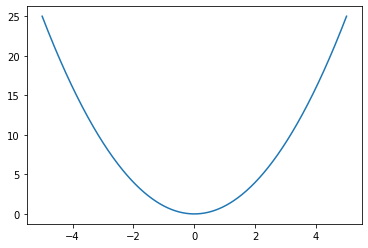

In [29]:
x = np.linspace(-5,5,100)
plt.plot(x,x**2)
plt.show()

In order to decorate this simple graph, the following syntaxes can be used:

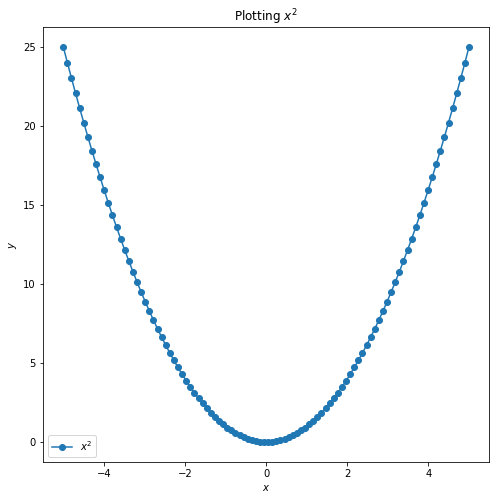

In [30]:
x = np.linspace(-5,5,100)

plt.figure(figsize=(8,8))  # size of the figure in inches
plt.title(r'Plotting $x^2$')  # figure's title (LaTeX supported)
plt.xlabel(r'$x$')  # horizontal axis title
plt.ylabel(r'$y$')  # vertical axis title
plt.plot(x, x**2, marker='o', label=r"$x^2$")  # plots the graph and marks each point with a point
plt.legend()  # displays legends
plt.show()  # displays the figure with all above settings

<!-- dom:FIGURE: [https://python.guillod.org/fig/matplotlib-x2.png, width=800 frac=0.8] -->


The documentation for Matplotlib is available [here](https://matplotlib.org/users/index.html).


**a)**
On the same figure, draw $\sin(kx)$ and $\cos(kx)$ for $k=1,2,3$ and $x\in[0,2\pi]$. Find a way to mark each tick on the horizontal axis with an interval of $\frac{\pi}{2}$:
<!-- dom:FIGURE: [https://python.guillod.org/fig/matplotlib-sincos.png, width=800 frac=0.8] -->
<!-- begin figure -->

<p></p>
<img src="https://python.guillod.org/fig/matplotlib-sincos.png" width=800>

<!-- end figure -->

<!-- --- begin hint in exercise --- -->

**Indication:**
Use the fonction `xticks` or `set_xticks` and `set_xticklabels` described [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html).

<!-- --- end hint in exercise --- -->



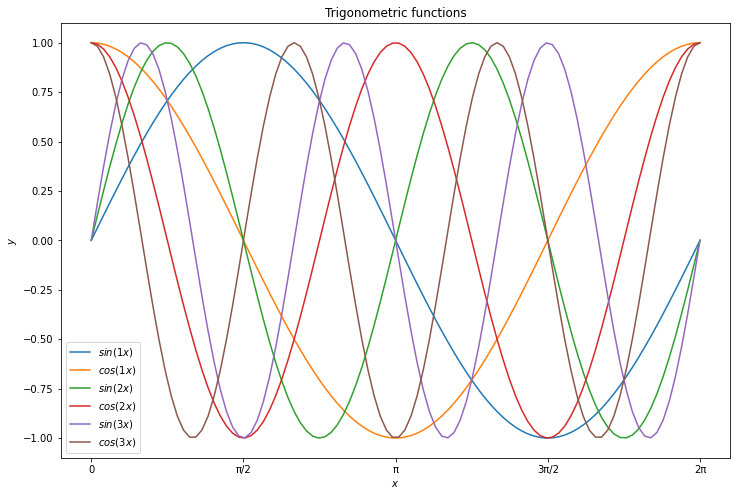

In [31]:
x = np.linspace(0,2*np.pi,100)

plt.figure(figsize=(12,8))
plt.title(r'Trigonometric functions')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.xticks(np.arange(0,2*np.pi+0.1,np.pi/2),['0','π/2','π','3π/2','2π'])


for k in range(1,4):
    plt.plot(x, np.sin(k*x), label=r"$sin(" + str(k) + "x)$")
    plt.plot(x, np.cos(k*x), label=r"$cos(" + str(k) + "x)$")

plt.legend()
plt.show()


**b)**
Look up the function `imshow` to represent a matrix of random numbers between $[0,1]$ of size $10\times10$:
<!-- dom:FIGURE: [https://python.guillod.org/fig/matplotlib-imshow.png, width=400 frac=0.4] -->
<!-- begin figure -->

<p></p>
<img src="https://python.guillod.org/fig/matplotlib-imshow.png" width=400>

<!-- end figure -->



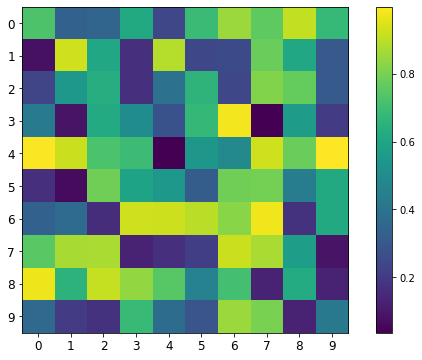

In [32]:
m = np.random.rand(10,10)
plt.figure(figsize=(10,6))
plt.imshow(m)
plt.xticks(np.arange(10), fontsize=12)
plt.yticks(np.arange(10), fontsize=12)
plt.colorbar()
plt.show()


**c)**
<span style="color:red">!</span> Plot the density of the function $f(x,y) = \frac{-y}{5} + e^{-x^2-y^2}$ for $x\in[-3,3]$ and $y\in[-3,3]$ and its contour lines:
<!-- dom:FIGURE: [https://python.guillod.org/fig/matplotlib-2d.png, width=1000 frac=0.95] -->
<!-- begin figure -->

<p></p>
<img src="https://python.guillod.org/fig/matplotlib-2d.png" width=1000>

<!-- end figure -->



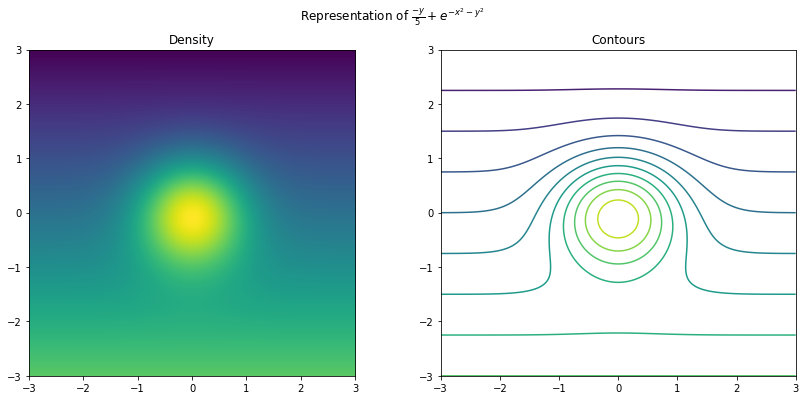

In [28]:
def f(x, y):
    return -y/5 + np.exp(-x**2-y**2)

x = np.linspace(-3, 3, 1000)
y = np.linspace(-3, 3, 1000)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.imshow(Z, extent=[-3, 3, -3, 3], origin='lower')
ax2.contour(X, Y, Z, 15)
fig.suptitle(r'Representation of $\frac{-y}{5}+e^{-x^2-y^2}$', fontsize=12)
ax1.set_title(r'Density')
ax2.set_title(r'Contours')
plt.show()

<!-- --- end exercise --- -->




<!-- --- begin exercise --- -->

# Exercise 3.4: <span style="color:red">!</span> Indexing of tables

The slicing method helps select a block in a table, but it is also possible to use an index table to access elements:

In [33]:
sq = np.arange(12)**2  # array of squares
i = np.array([1,3,8,5])  # table of index
sq[i]  # table of element of sq of index in i

array([ 1,  9, 64, 25])

Note that it's also possible to index by a table of higher dimension. The results are those of the same shape as the table used for indexing:

In [34]:
j = np.array([[3,4],[9,7]])  # 2-dimension table used for indexing
sq[j]  # selection of elements of a of index in j

array([[ 9, 16],
       [81, 49]])

For a table of higher dimension:

In [35]:
arr = np.array([[0,1,2,3],[4,5,6,7],[8,9,10,11]])
i = np.array([0,1,2,2])  # table of 1st index
j = np.array([1,0,3,1])  # table of 2nd index
arr[i,j]  # selection of elements of b with 1st index in i and 2nd index in j

array([ 1,  4, 11,  9])

Finally, it's possible to index a table by another table of bool:

In [37]:
arr = np.array([[0,1,2,3],[4,5,6,7],[8,9,10,11]])
cond = (arr > 5)  # matrix of bool, True if corresponding values in c is greater than 5, else False
arr[cond] = -1  # assigns the value -1 to all corresponding True values in cond

# The result is a new matrix from the old one, with any element greater than 5 replaced by -1
arr

array([[ 0,  1,  2,  3],
       [ 4,  5, -1, -1],
       [-1, -1, -1, -1]])

For the following questions, consider the following sequence of values:

In [ ]:
[0.9602, -0.99, 0.2837, 0.9602, 0.7539, -0.1455, -0.99, -0.9111, 0.9602, -0.1455, -0.99, 0.5403, -0.99, 0.9602, 0.2837, -0.99, 0.2837, 0.9602]

being the results of a measurement done every 0.1 second between the time values between 2.0 and 3.7 seconds.


**a)**
The measurements are supposed to be positive, modify the data so that any negative values are zero.

In [38]:
measurements = np.array([0.9602, -0.99, 0.2837, 0.9602, 0.7539, -0.1455, -0.99, -0.9111, 0.9602, \
                         -0.1455, -0.99, 0.5403, -0.99, 0.9602, 0.2837, -0.99, 0.2837, 0.9602])
zeros = (measurements < 0)
measurements[zeros] = 0
measurements

array([0.9602, 0.    , 0.2837, 0.9602, 0.7539, 0.    , 0.    , 0.    ,
       0.9602, 0.    , 0.    , 0.5403, 0.    , 0.9602, 0.2837, 0.    ,
       0.2837, 0.9602])


**b)**
Find the time values where the measurement is maximal.

In [41]:
maxi = np.where(measurements == np.max(measurements))
print("Time values where the measurement is maximal are :", end=" ")
print(", ".join(map(lambda x: str(2+x*0.1),maxi[0].tolist())))

Time values where the measurement is maximal are : 2.0, 2.3, 2.8, 3.3, 3.7



**c)**
For each maximal measurement, output the preceeding measurement, the current maximal measurement, and the following measurement. In case of inexistence, replace with `np.nan`.

In [47]:
measurements[measurements == 0] = np.nan

for i in maxi[0]:
    if i == 0:
        before = np.nan
    else:
        before = measurements[i-1]
    try:
        after = measurements[i+1]
    except:
        after = np.nan
    
    print(before, measurements[i], after)

nan 0.9602 nan
0.2837 0.9602 0.7539
nan 0.9602 nan
nan 0.9602 0.2837
0.2837 0.9602 nan
